In [1]:
import cv2
from PIL import Image
from ponyslayer.utils import imshow, imshows, imdraw, imdraws, imdraws_color, immask, immasks, implot
import numpy as np
import imutils
from ponyslayer.unicorn import rotate_image

step = 5 # Angel step from 360 degree

In [2]:
def padding(img):
    s = max(img.shape[0:2])
    f = np.zeros((s, s),np.uint8)
    ax,ay = (s - img.shape[1])//2,(s - img.shape[0])//2 # Getting the centering position
    f[ay:img.shape[0]+ay,ax:ax+img.shape[1]] = img
    return f

In [3]:
imageA = cv2.imread("Start1.png")
imageB = cv2.imread("Start2.png")
imageC = cv2.imread("Start3.png")
imageSet_raw = [imageA, imageB, imageC]

template_raw = imageC

In [4]:
imageSet_gray = [cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY) for img in imageSet_raw]
imageSet_canny = [cv2.Canny(img, 50, 200) for img in imageSet_gray]
template_gray = cv2.cvtColor(template_raw.copy(), cv2.COLOR_BGR2GRAY)
template_canny = cv2.Canny(template_gray, 50, 200)
(tH, tW) = template_canny.shape[:2]
### Padding ###
imageSet = [padding(img) for img in imageSet_canny]
template = padding(template_canny)


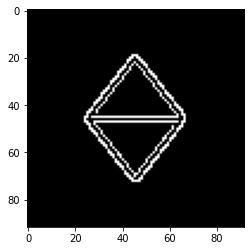

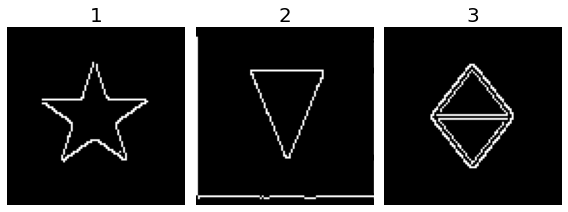

In [5]:
imshow(template)
imshows(imageSet, [str(i+1) for i in range(len(imageSet))])

In [6]:
best = {"index":None, "score":0}
for i in range(len(imageSet)): best[str(i)] = 0
for rotation in range(0, 359, step):
    rotated_template = rotate_image(template.copy(), rotation)
    for i in range(len(imageSet)):
        result = cv2.matchTemplate(imageSet[i], template, cv2.TM_CCOEFF) # Get score (for cv2.TM_CCOEFF more mean better)
        (_, score, _, _) = cv2.minMaxLoc(result)
        if score > best["score"]:
            best["index"] = i
            best["score"] = score
        if score > best[str(i)]: best[str(i)] = score
print(best)
best_index = int(best["index"])
best_score = best[str(best_index)]

{'index': 2, 'score': 21100764.0, '0': 1946524.625, '1': 191172.265625, '2': 21100764.0}
